In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

In [25]:
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [26]:
x

array([[-0.42720718,  2.22040969],
       [ 1.19906276,  1.8876772 ],
       [ 2.25002659, -1.50513819],
       ...,
       [ 0.84641529,  0.31806392],
       [-1.1756159 , -1.07668961],
       [ 0.41979697, -0.18754044]])

In [27]:
pd.DataFrame(x)[0]

0     -0.427207
1      1.199063
2      2.250027
3      1.663758
4      1.329874
         ...   
995   -1.395453
996   -2.366075
997    0.846415
998   -1.175616
999    0.419797
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

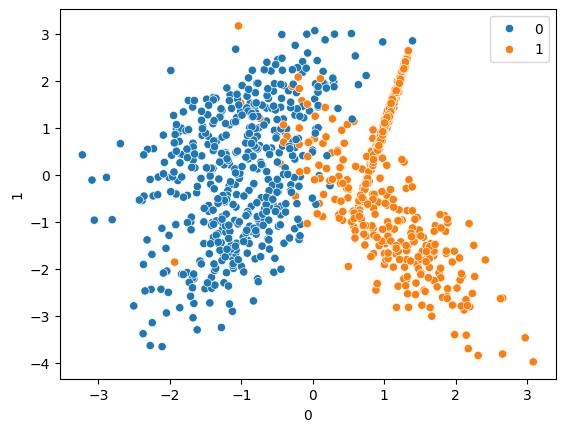

In [28]:
sns.scatterplot(x=pd.DataFrame(x)[0],y= pd.DataFrame(x)[1],hue=y)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [30]:
svc = SVC(kernel = 'linear')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [31]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [32]:
y_pred = svc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[171  12]
 [  3 144]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       183
           1       0.92      0.98      0.95       147

    accuracy                           0.95       330
   macro avg       0.95      0.96      0.95       330
weighted avg       0.96      0.95      0.95       330



In [37]:
# using rbf kernel
rbf = SVC(kernel = 'rbf')
rbf.fit(X_train,y_train)

SVC()

In [38]:
y_pred = rbf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[171   8]
 [  3 148]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       179
           1       0.95      0.98      0.96       151

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel':['rbf']}
        

In [41]:
grid = GridSearchCV(SVC(),param_grid = param_grid,refit=True,cv=5,verbose=3)

In [42]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.978 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.970 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.970 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.910 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [44]:
y_pred = grid.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[171   8]
 [  3 148]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       179
           1       0.95      0.98      0.96       151

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330

